# ECOMMERCE AND RETAIL B2B CASE STUDY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

received_payment_data = pd.read_csv('/content/drive/MyDrive/Upgrad_Projects /Received_Payments_Data.csv')



In [ ]:
received_payment_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [ ]:
invoices.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [ ]:
# Data Cleaning and Preprocessing
received_payment_data = received_payment_data[received_payment_data['USD Amount'] >= 0]  # Remove negative USD amounts
received_payment_data['INVOICE_CREATION_DATE'] = pd.to_datetime(received_payment_data['INVOICE_CREATION_DATE'])
received_payment_data['DUE_DATE'] = pd.to_datetime(received_payment_data['DUE_DATE'])
received_payment_data['Payment_On_Time'] = (received_payment_data['DUE_DATE'] >= received_payment_data['INVOICE_CREATION_DATE']).astype(int)
selected_features = ['USD Amount', 'Payment_On_Time']  # Select relevant features
X = received_payment_data[selected_features]
y = received_payment_data['Payment_On_Time']

<ipython-input-29-f5f4a78024c0>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  received_payment_data['INVOICE_CREATION_DATE'] = pd.to_datetime(received_payment_data['INVOICE_CREATION_DATE'])
<ipython-input-29-f5f4a78024c0>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  received_payment_data['DUE_DATE'] = pd.to_datetime(received_payment_data['DUE_DATE'])


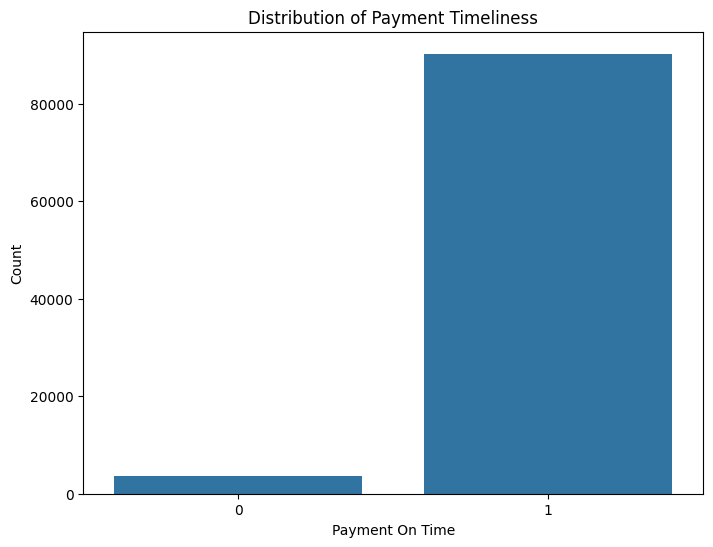

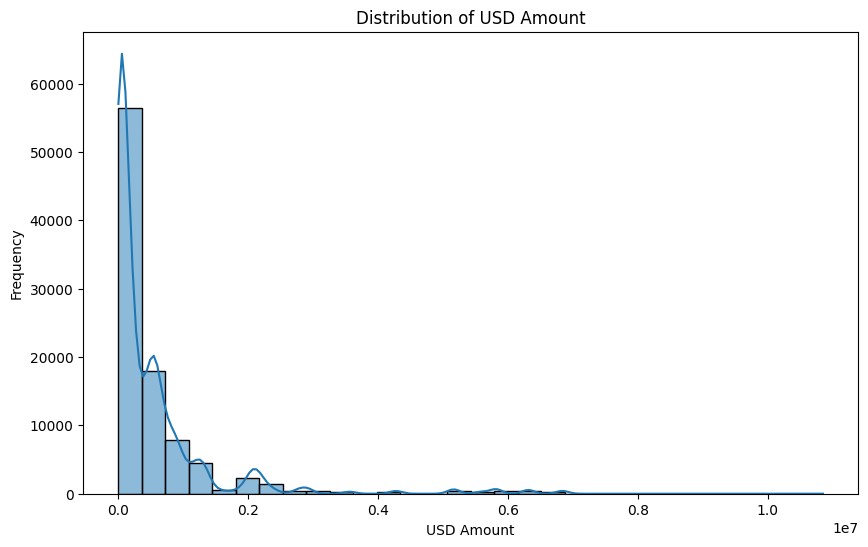

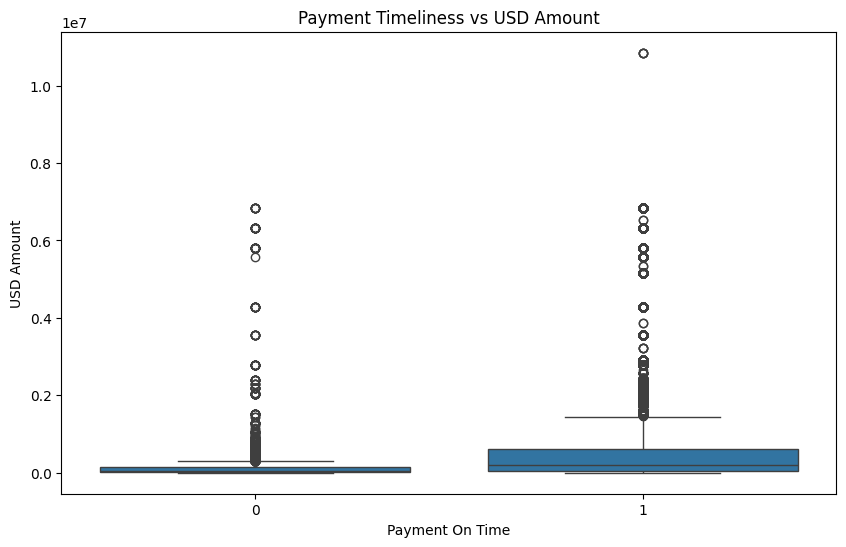

In [ ]:
# Exploratory Data Analysis (EDA)
# Let's start by checking the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment_On_Time', data=received_payment_data)
plt.title('Distribution of Payment Timeliness')
plt.xlabel('Payment On Time')
plt.ylabel('Count')
plt.show()

# Next, let's visualize the distribution of USD Amount
plt.figure(figsize=(10, 6))
sns.histplot(received_payment_data['USD Amount'], bins=30, kde=True)
plt.title('Distribution of USD Amount')
plt.xlabel('USD Amount')
plt.ylabel('Frequency')
plt.show()

# Now, let's explore the relationship between USD Amount and Payment Timeliness
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment_On_Time', y='USD Amount', data=received_payment_data)
plt.title('Payment Timeliness vs USD Amount')
plt.xlabel('Payment On Time')
plt.ylabel('USD Amount')
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# Model Building
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the Random Forest classifier
clf.fit(X_train_resampled, y_train_resampled)  # Train the classifier
y_pred = clf.predict(X_test)

In [ ]:
# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 1116     0]
 [    0 27066]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1116
           1       1.00      1.00      1.00     27066

    accuracy                           1.00     28182
   macro avg       1.00      1.00      1.00     28182
weighted avg       1.00      1.00      1.00     28182



In [ ]:
# Analyze feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
           Feature  Importance
1  Payment_On_Time    0.880072
0       USD Amount    0.119928


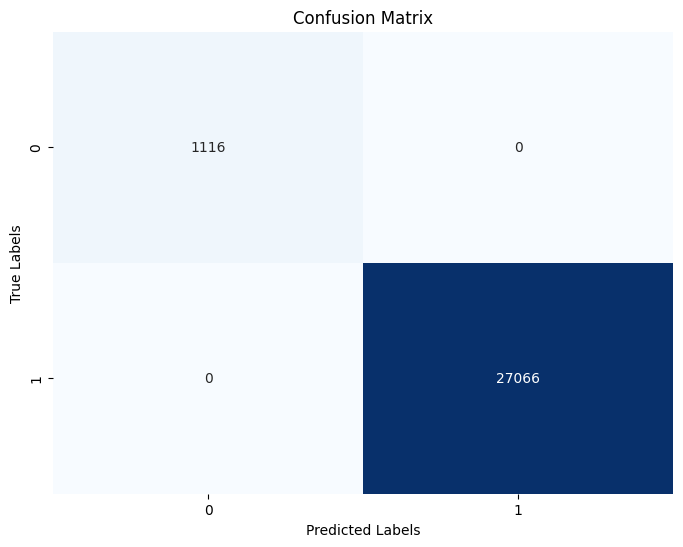

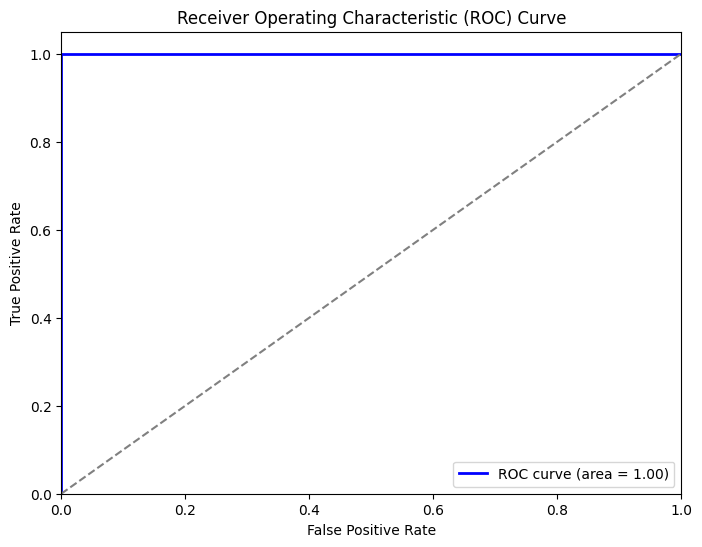

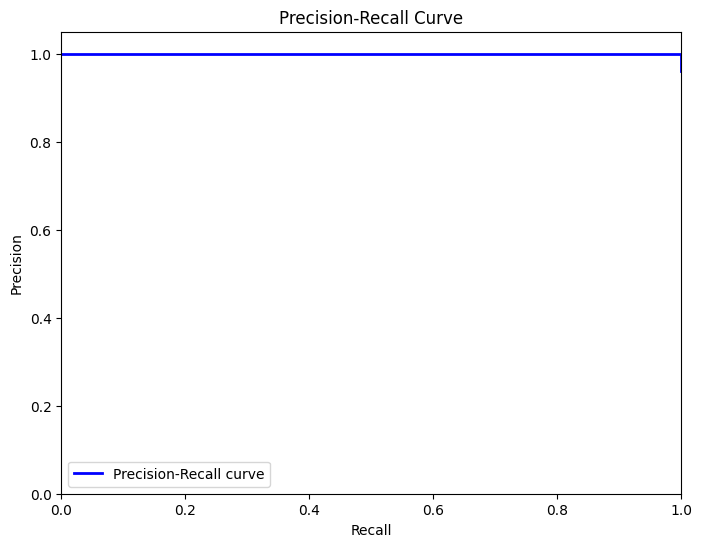

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
# Customer Segmentation
# Calculate average payment time in days for each customer
avg_payment_time = received_payment_data.groupby('CUSTOMER_NAME')['Payment_On_Time'].mean()

# Calculate standard deviation for payment time for each customer
std_payment_time = received_payment_data.groupby('CUSTOMER_NAME')['Payment_On_Time'].std()

# Combine average and standard deviation into a DataFrame
customer_segmentation_data = pd.DataFrame({'Avg_Payment_Time': avg_payment_time, 'Std_Payment_Time': std_payment_time})

customer_segmentation_data.dropna(inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


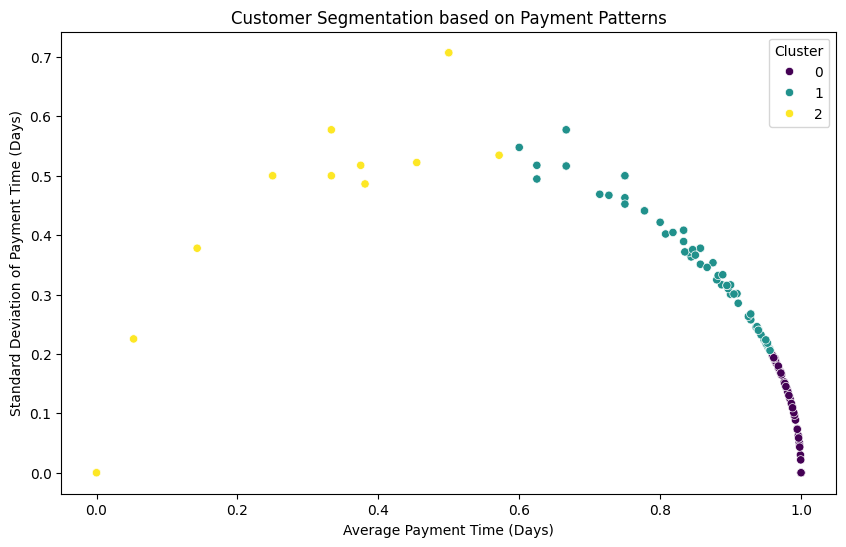

In [ ]:

# Perform clustering using K-means algorithm
from sklearn.cluster import KMeans

# Specify the number of clusters
n_clusters = 3

# Initialize KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans clustering on customer segmentation data
kmeans.fit(customer_segmentation_data)

# Add cluster labels to customer segmentation data
customer_segmentation_data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Payment_Time', y='Std_Payment_Time', hue='Cluster', data=customer_segmentation_data, palette='viridis')
plt.title('Customer Segmentation based on Payment Patterns')
plt.xlabel('Average Payment Time (Days)')
plt.ylabel('Standard Deviation of Payment Time (Days)')
plt.legend(title='Cluster')
plt.show()


In [ ]:
import pandas as pd

# Load the trained model
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Assuming the model is already trained
# Load the open invoice data
open_invoice_data = pd.read_csv('/content/drive/MyDrive/Qriocity/Case Study/Open_Invoice_data.csv',encoding='latin-1')

# Data Cleaning and Preprocessing
open_invoice_data['Transaction Date'] = pd.to_datetime(open_invoice_data['Transaction Date'], dayfirst=True)
open_invoice_data['Due Date'] = pd.to_datetime(open_invoice_data['Due Date'], dayfirst=True)

# Check the column names in open_invoice_data
print(open_invoice_data.columns)

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')


In [ ]:
# Data Cleaning and Preprocessing
open_invoice_data['Transaction Date'] = pd.to_datetime(open_invoice_data['Transaction Date'], dayfirst=True)
open_invoice_data['Due Date'] = pd.to_datetime(open_invoice_data['Due Date'], dayfirst=True)

# Remove comma from USD Amount column
open_invoice_data['USD Amount'] = open_invoice_data['USD Amount'].str.replace(',', '').astype(float)

# Feature Selection
selected_features = ['USD Amount']  # Select relevant features

# Train the classifier
X_train, y_train = received_payment_data[selected_features], received_payment_data['Payment_On_Time']
clf.fit(X_train, y_train)

# Predict late payments using the trained model
X_open_invoice = open_invoice_data[selected_features]
# Assuming 'selected_features' is defined based on the features used in the model training
open_invoice_data['Predicted_Late_Payment'] = clf.predict(X_open_invoice)

# Display the updated DataFrame with predicted late payments
print(open_invoice_data.head())

             AS_OF_DATE  Customer Type Customer_Name  Customer Account No  \
0  04-APR-2022 01:07:01      3rd Party     GIVE Corp              49144.0   
1  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
2  04-APR-2022 01:07:01  Related Party     AL J Corp              23152.0   
3  04-APR-2022 01:07:01  Related Party     AL R Corp              23312.0   
4  04-APR-2022 01:07:01  Related Party     ALLI Corp               7530.0   

  Transaction Number Transaction Date           Payment Term   Due Date  \
0       100210000438       2021-12-21              Immediate 2021-12-21   
1       100220000052       2022-02-01  30 Days from Inv Date 2022-03-03   
2       100220000143       2022-03-24  30 Days from Inv Date 2022-04-23   
3       100220000001       2022-01-04  15 Days from Inv Date 2022-01-19   
4       100220000105       2022-03-03       30 Days from EOM 2022-04-30   

  Transaction Currency Local Amount Transaction Class  AGE  USD Amount  \
0           

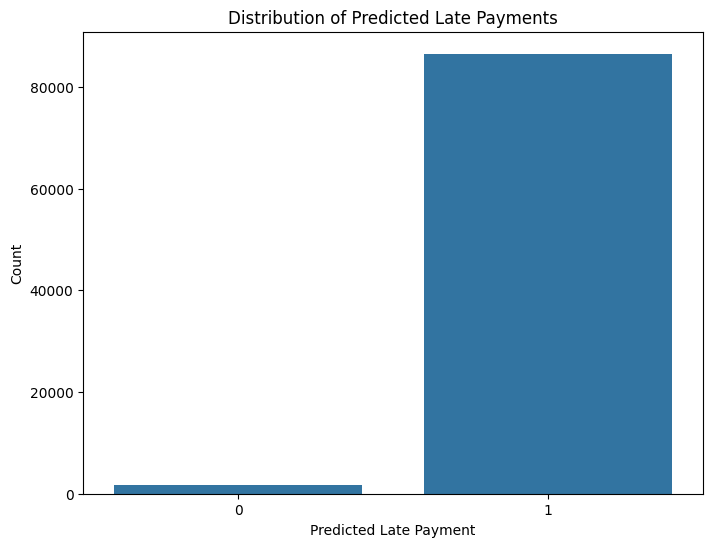

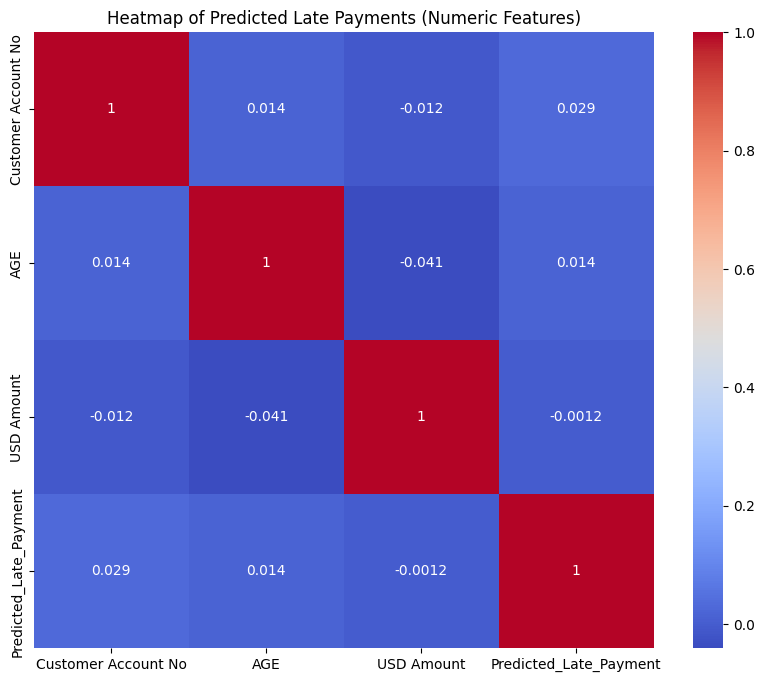

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Predicted Late Payments
plt.figure(figsize=(8, 6))
sns.countplot(x='Predicted_Late_Payment', data=open_invoice_data)
plt.title('Distribution of Predicted Late Payments')
plt.xlabel('Predicted Late Payment')
plt.ylabel('Count')
plt.show()


# Select only numeric columns for correlation calculation
numeric_columns = open_invoice_data.select_dtypes(include=[np.number])

# Heatmap of Predicted Late Payments (using only numeric features)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Predicted Late Payments (Numeric Features)')
plt.show()


From Our data explorations and predictions we have found that if the age of customer is less then there is chances of miss payments or late payments also if a customer spends more than usual then most likely they will miss payment.